In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing datasets

In [35]:
df1 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Books.csv')
df2 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Ratings.csv')
df3 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Users.csv')

C:\Users\pjr\AppData\Local\Temp\ipykernel_5944\1986335104.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Books.csv')


Understanding this dataset

In [36]:
# df1 Books
print(df1.shape) # No of rows and columns 
df1.head() # First 5 rows in the dataset

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [37]:
df1.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [38]:
df1.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [39]:
# df2 Ratings
print(df2.shape)
df2.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [40]:
# df3 Users 
print(df3.shape)
df3.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [41]:
df1.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [42]:
df3.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Data Cleaning

In [43]:
df1.duplicated() #  Check for duplicates in rows 

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [44]:
df2.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [45]:
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [46]:
df1.nunique().sort_values(ascending=False) 

ISBN                   271360
Book-Title             242135
Book-Author            102023
Publisher               16807
Year-Of-Publication       202
dtype: int64

In [47]:
df1['Year-Of-Publication'] = pd.to_numeric(df1['Year-Of-Publication'], errors='coerce')

In [48]:
# Dealing with null values of df1(Books)
df1.isnull().sum().sort_values(ascending=True)

ISBN                   0
Book-Title             0
Book-Author            1
Publisher              2
Year-Of-Publication    3
dtype: int64

In [49]:
# Remove rows with null values 
df1 = df1.dropna(subset=['Book-Author','Publisher','Year-Of-Publication'])

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [51]:
df2.isnull().sum().sort_values(ascending=True)

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [52]:
df3.isnull().sum().sort_values(ascending=True)

User-ID          0
Location         0
Age         110762
dtype: int64

In [53]:
# Dealing with null values of df3(User's age)
df3['Age'].dropna(inplace=True)

Dealing with outliers 

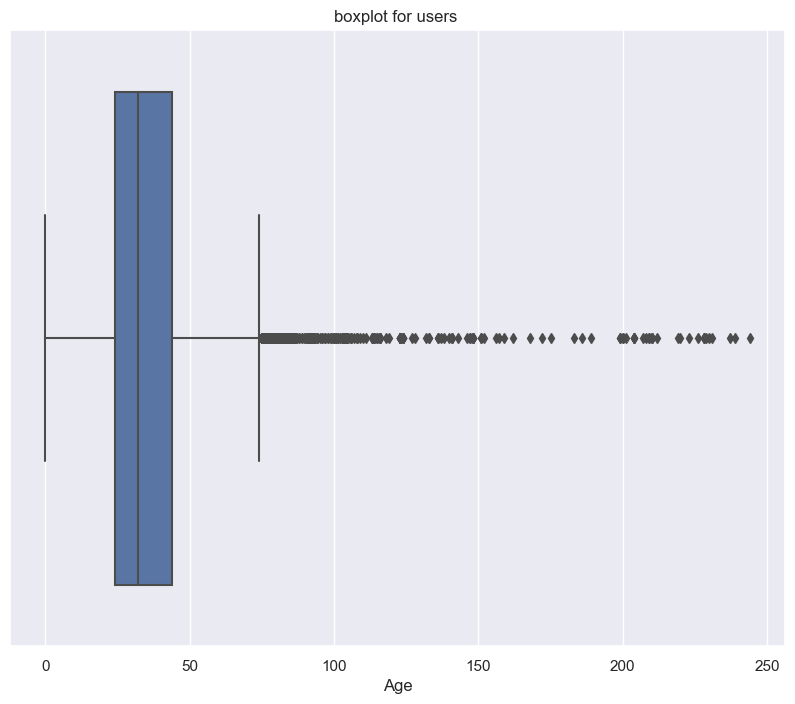

In [54]:
# df3
plt.figure(figsize=(10,8))
plt.title('boxplot for users ')
sns.boxplot(data=df3, x='Age')
plt.show()

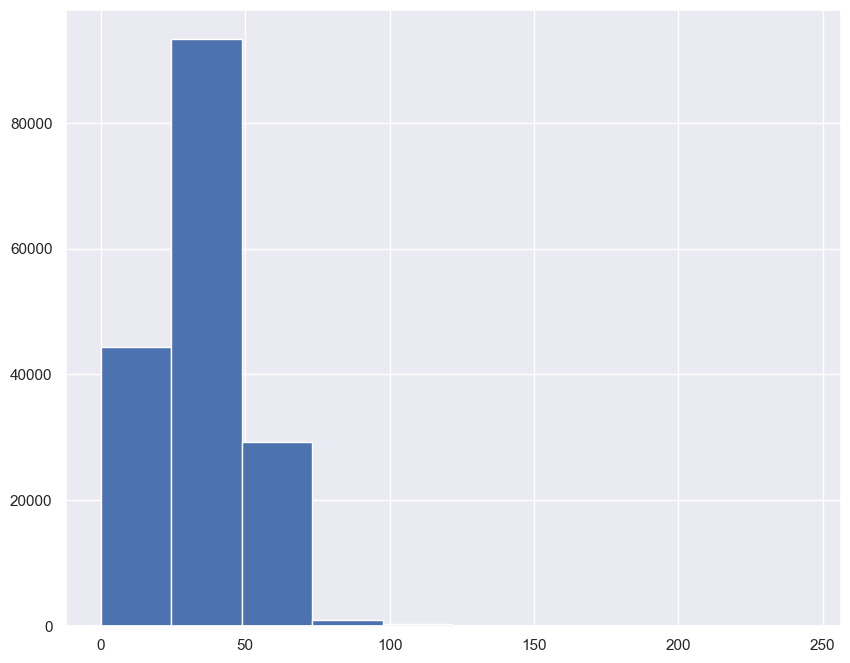

In [55]:
plt.figure(figsize=(10,8))
plt.hist(data=df3, x = 'Age')
plt.show()

In [56]:
def find_boundaries(data,variable):
    # Finding the IQR
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)
    IQR = Q3 - Q1
    # Finding lower and upper bounadry
    l_boundary = Q1 - 1.5 * IQR
    u_boundary = Q3 + 1.5 * IQR 
    return l_boundary, u_boundary

l_column , u_column = find_boundaries(df3, 'Age')
print("Lower boundary is: ", l_column)
print("Upper boundary is: ", u_column)


Lower boundary is:  -6.0
Upper boundary is:  74.0


In [57]:
remove = np.where(df3['Age'] > 100, True,
                  np.where(df3['Age'] < 4, True, False))

df3 = df3.loc[~(remove)]


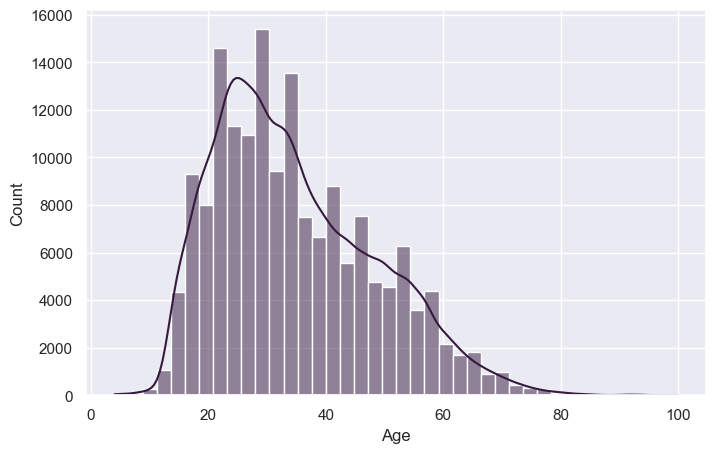

In [58]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data=df3, x= 'Age', kde=True, bins=40)

<Axes: >

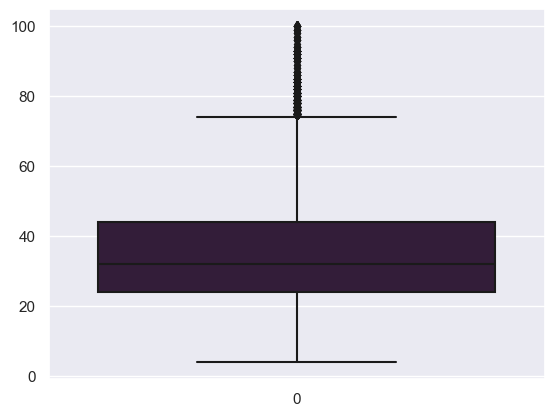

In [59]:
sns.boxplot(df3['Age'])

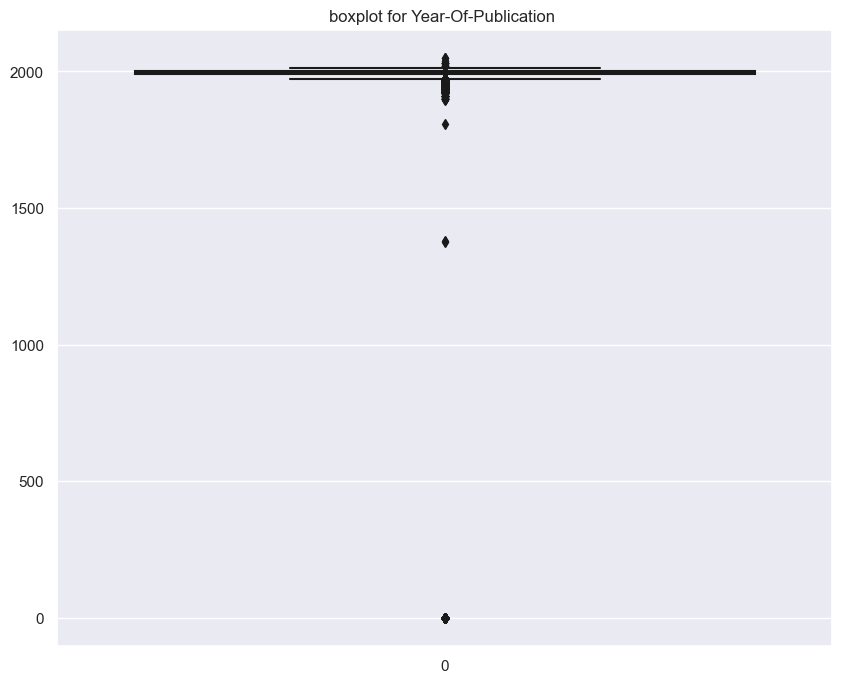

In [60]:
# df1
plt.figure(figsize=(10,8))
plt.title('boxplot for Year-Of-Publication ')
sns.boxplot(df1['Year-Of-Publication'])
plt.show()

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

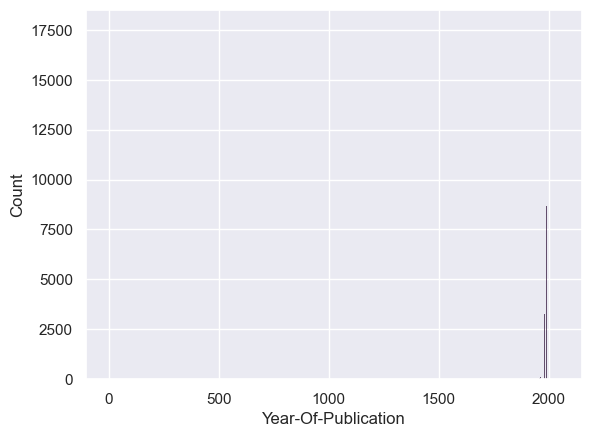

In [61]:
# df1['Year-Of-Publication'].plot(kind='hist')
sns.histplot(df1['Year-Of-Publication'])

In [62]:
lb_column,ub_column = find_boundaries(df1, 'Year-Of-Publication')
print("Lower boundary is: ", lb_column)
print("Upper boundary is: ", ub_column)

Lower boundary is:  1972.5
Upper boundary is:  2016.5


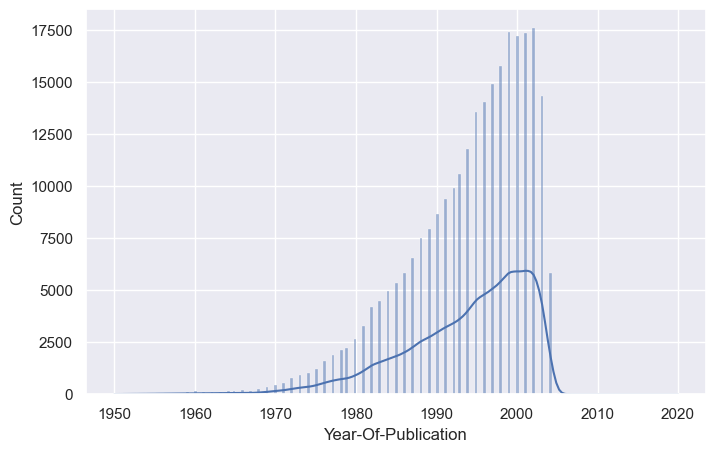

In [63]:
remove_year = np.where(df1['Year-Of-Publication'] < 1950, True,
                       np.where(df1['Year-Of-Publication'] > 2020, True, False))
df1 = df1.loc[~(remove_year)]

# Histogram for year of population 
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
ax = sns.histplot(data=df1, x = 'Year-Of-Publication', kde=True)

Dealing with categorical data 

In [64]:
# Construct new attribute
df3['Country'] = df3['Location'].str.extract(r',\s*([^,]+)$')

In [66]:
df3.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [ ]:
df3.drop(columns=['Location'], inplace=True)

In [68]:
country_counts = df3['Country'].value_counts()
print(country_counts)

usa                139267
canada              21600
united kingdom      18430
germany             16949
spain               13071
                    ...  
carter                  1
usa & canada            1
p.r.china               1
none                    1
united kingdom.         1
Name: Country, Length: 703, dtype: int64


([<matplotlib.patches.Wedge at 0x29338098250>,
 [Text(-0.03452318509924508, 1.0994581163876154, 'usa'),
  Text(-1.047138158403643, -0.33690009975514584, 'canada'),
  Text(-0.7883242826594066, -0.7671667519969385, 'united kingdom'),
  Text(-0.4202252229609993, -1.0165681295355362, 'germany'),
  Text(-0.05126514068466781, -1.098804753061517, 'spain'),
  Text(0.2596897159317411, -1.0689065681523768, 'australia'),
  Text(0.5292434567995304, -0.9643139340665382, 'italy'),
  Text(0.683531116356232, -0.861849878443342, 'france'),
  Text(0.7481638132724328, -0.8063813666681867, 'portugal'),
  Text(0.8052142719910986, -0.7494197596686687, 'new zealand'),
  Text(0.8556618948563096, -0.6912616882852036, 'netherlands'),
  Text(0.8920590776564588, -0.643607490611093, 'switzerland'),
  Text(0.9164680750286701, -0.6083471603067151, 'brazil'),
  Text(0.9378478684296231, -0.5748403045037922, 'china'),
  Text(0.9564319504729547, -0.5433580073160785, 'sweden'),
  Text(0.972786552601332, -0.51350396598080

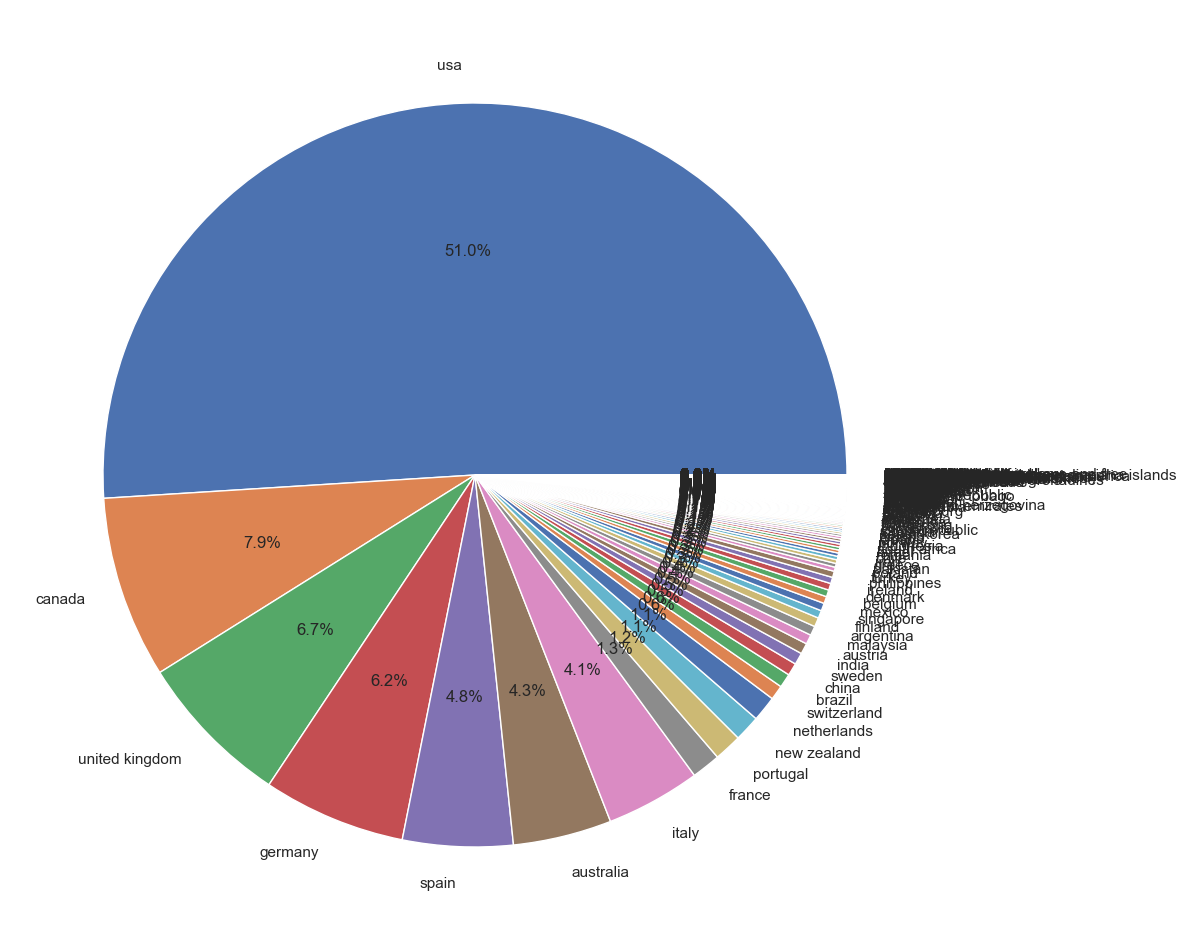

In [72]:
plt.figure(figsize=(12,16))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')